# Theory Questions


**Q1. What is Boosting in Machine Learning**

--> Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to form a strong learner. The key idea is to train models sequentially, each new model focusing more on the mistakes made by the previous ones. It adjusts the weights of data points to give more importance to incorrectly predicted samples. Over time, this process improves accuracy by reducing both bias and variance.

**Q2. How does Boosting differ from Bagging**

--> Boosting and Bagging are both ensemble learning methods that combine multiple models to improve prediction accuracy, but they differ in how they train and combine the models. Bagging reduces variance by training models in parallel on different subsets of the data and averaging their predictions. Boosting, on the other hand, focuses on reducing bias by training models sequentially, with each model learning from the errors of the previous one.

**3. What is the key idea behind AdaBoost**

--> AdaBoost (Adaptive Boosting) works by assigning weights to training samples. Initially, all samples have equal weights. After each iteration, the weights of misclassified samples are increased, so the next weak learner focuses more on the hard-to-classify cases. In the end, all weak learners contribute to the final prediction with a weight based on their accuracy.

**Q4. Explain the working of AdaBoost with an example**

--> Example (Binary Classification):

Start with a dataset where each point is assigned an equal weight.

Train a weak learner (e.g., decision stump).

Calculate the error of this model. Increase the weights of the misclassified points.

Train the next weak learner using the new weights.

Repeat this process for several rounds.

Combine all weak learners' predictions using a weighted vote.

Result: The final model is more accurate because it focuses on the hardest-to-classify instances.

**5. What is Gradient Boosting, and how is it different from AdaBoost**

--> Gradient Boosting builds models sequentially like AdaBoost but uses a different approach. Instead of adjusting sample weights, it minimizes a loss function using gradient descent.

AdaBoost: Focuses on reweighting samples based on classification error.

Gradient Boosting: Optimizes a specified loss function (like MSE for regression or log-loss for classification) using gradients.

Each new model in Gradient Boosting is trained to predict the residual errors of the previous model.

**Q6. What is the loss function in Gradient Boosting**

--> The loss function in Gradient Boosting depends on the type of problem:

Regression: Mean Squared Error (MSE), Mean Absolute Error (MAE)

Classification: Log Loss (also called logistic loss), Cross-Entropy Loss

The goal is to reduce this loss function by fitting new models to the residuals of the previous ones.

**Q7. How does XGBoost improve over traditional Gradient Boosting**

--> XGBoost (Extreme Gradient Boosting) is an optimized version of Gradient Boosting that offers:

Regularization (L1 & L2): Helps prevent overfitting.

Parallel processing: Speeds up training.

Handling missing values internally.

Tree pruning and depth control for efficient learning.

Weighted quantile sketch for better handling of imbalanced data.

Sparsity-aware algorithm for high performance.

These features make XGBoost faster and more accurate than traditional Gradient Boosting.

**Q8. What is the difference between XGBoost and CatBoost**

--> XGBoost and CatBoost are both powerful gradient boosting algorithms, but they differ significantly in their approach to handling categorical data and their tree-building strategies. XGBoost, by default, requires categorical features to be pre-processed, while CatBoost is specifically designed to handle them directly without pre-processing

**Q9. What are some real-world applications of Boosting techniques**

--> Boosting is used in various real-world applications:

Credit scoring in banking

Spam detection in email filtering

Fraud detection in finance

Customer churn prediction in telecom

Recommendation systems

Medical diagnosis like cancer prediction

Click-through rate prediction in online ads

**Q10. How does regularization help in XGBoost**

--> Regularization in XGBoost prevents overfitting by penalizing complex models. It uses:

L1 (Lasso): Shrinks less important features' coefficients to zero.

L2 (Ridge): Distributes error more evenly across features.

It ensures that the model generalizes better to unseen data by discouraging overly complex decision trees.

**Q11. What are some hyperparameters to tune in Gradient Boosting models**

--> Key hyperparameters include:

n_estimators: Number of trees

learning_rate: Step size for updating the model

max_depth: Maximum depth of each tree

subsample: Fraction of samples used per tree

min_samples_split: Minimum samples needed to split a node

min_samples_leaf: Minimum samples per leaf node

loss: Type of loss function (e.g., MSE, MAE)

Tuning these helps control the model's accuracy, complexity, and generalization.

**Q12. What is the concept of Feature Importance in Boosting**

--> Feature Importance shows how useful a feature was in building the boosted model.

Types of feature importance:

Gain: Total improvement brought by a feature

Frequency: How often a feature is used in splits

Coverage: Number of samples affected by the splits

Boosting models like XGBoost and Gradient Boosting provide built-in methods to calculate and visualize feature importance.

**Q13. Why is CatBoost efficient for categorical data?**

--> CatBoost is designed to handle categorical data efficiently without needing manual preprocessing.

Key reasons:

Native support for categorical features: Uses advanced encoding like ordered target statistics.

Reduces overfitting: Special techniques like ordered boosting.

Saves preprocessing time: No need for one-hot or label encoding.

Performs better: Often provides better accuracy when working with categorical-heavy datasets.

# Practical Questions

In [1]:
#14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [2]:
#15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 74.31477613958765


In [3]:
#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
for name, importance in zip(data.feature_names, importances):
    print(f"{name}: {importance:.4f}")

mean radius: 0.0003
mean texture: 0.0279
mean perimeter: 0.0003
mean area: 0.0006
mean smoothness: 0.0001
mean compactness: 0.0014
mean concavity: 0.0006
mean concave points: 0.1318
mean symmetry: 0.0009
mean fractal dimension: 0.0003
radius error: 0.0031
texture error: 0.0041
perimeter error: 0.0017
area error: 0.0083
smoothness error: 0.0005
compactness error: 0.0007
concavity error: 0.0021
concave points error: 0.0044
symmetry error: 0.0018
fractal dimension error: 0.0013
worst radius: 0.4432
worst texture: 0.0350
worst perimeter: 0.1505
worst area: 0.0294
worst smoothness: 0.0073
worst compactness: 0.0008
worst concavity: 0.0139
worst concave points: 0.1269
worst symmetry: 0.0002
worst fractal dimension: 0.0005


In [4]:
#17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.9238585138502942


In [6]:
#18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.956140350877193
Gradient Boosting Accuracy: 0.956140350877193


In [9]:
#19. Train a CatBoost Classifier and evaluate using F1-Score

from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

print("F1 Score:", f1_score(y_test, cat_pred))

F1 Score: 0.9790209790209791


In [10]:
#20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))

MSE: 0.04869866371154785


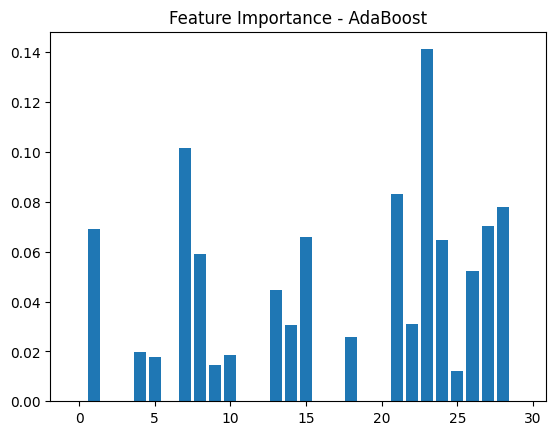

In [11]:
#21. Train an AdaBoost Classifier and visualize feature importance

import matplotlib.pyplot as plt

model = AdaBoostClassifier()
model.fit(X_train, y_train)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("Feature Importance - AdaBoost")
plt.show()

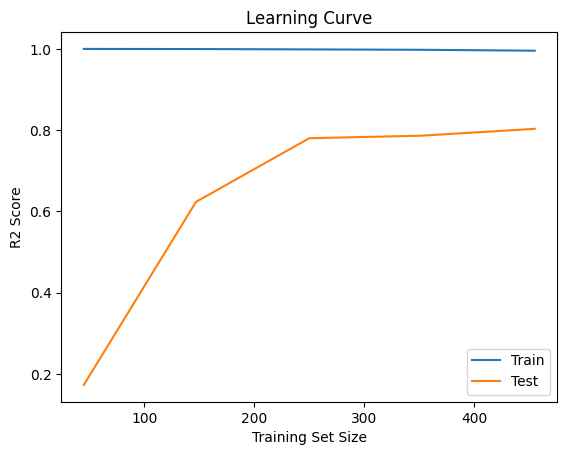

In [12]:
#22. Train a Gradient Boosting Regressor and plot learning curves

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(), X, y, cv=5, scoring='r2')

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, test_mean, label='Test')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

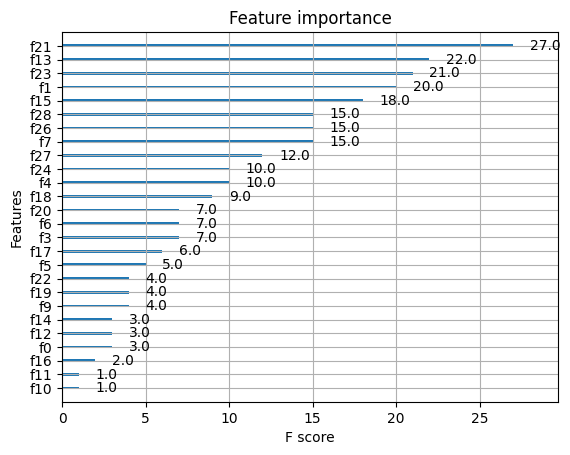

In [13]:
#23. Train an XGBoost Classifier and visualize feature importance

import xgboost as xgb
xgb.plot_importance(xgb_model)
plt.show()

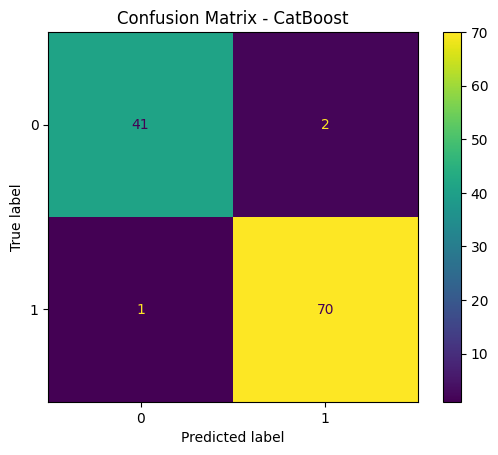

In [14]:
#24. Train a CatBoost Classifier and plot the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

cat_pred = cat_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, cat_pred)
plt.title("Confusion Matrix - CatBoost")
plt.show()

In [15]:
#25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    print(f"n_estimators={n}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")

n_estimators=10, Accuracy=0.9649122807017544
n_estimators=50, Accuracy=0.9649122807017544
n_estimators=100, Accuracy=0.9736842105263158
n_estimators=200, Accuracy=0.9736842105263158


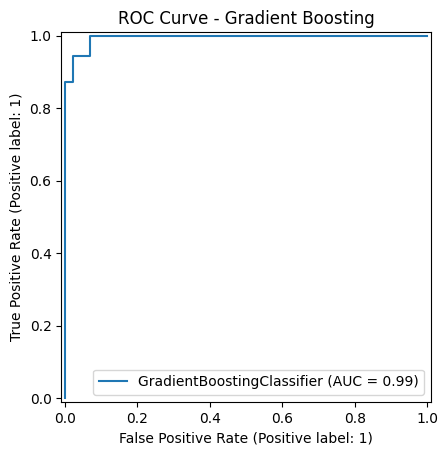

In [16]:
#26. Train a Gradient Boosting Classifier and visualize the ROC curve

from sklearn.metrics import RocCurveDisplay

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(gb_model, X_test, y_test)
plt.title("ROC Curve - Gradient Boosting")
plt.show()

In [17]:
#27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Learning Rate:", grid.best_params_)

Best Learning Rate: {'learning_rate': 0.3}


In [19]:
#28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

from sklearn.utils import resample
import numpy as np

# Create imbalance
X_majority, y_majority = X[y==0], y[y==0]
X_minority, y_minority = X[y==1], y[y==1]
X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority,
                                                      replace=True, n_samples=len(y_majority), random_state=42)

X_balanced = np.vstack((X_majority, X_minority_upsampled))
y_balanced = np.hstack((y_majority, y_minority_upsampled))

model_weighted = CatBoostClassifier(class_weights=[1, 10], verbose=0)
model_weighted.fit(X_train, y_train)
print("Weighted F1:", f1_score(y_test, model_weighted.predict(X_test)))

Weighted F1: 0.9793103448275862


In [20]:
#29. Train an AdaBoost Classifier and analyze the effect of different learning rates

for lr in [0.01, 0.1, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    print(f"Learning Rate={lr}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")

Learning Rate=0.01, Accuracy=0.9385964912280702
Learning Rate=0.1, Accuracy=0.956140350877193
Learning Rate=1.0, Accuracy=0.9649122807017544


In [22]:
#30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_multi = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss')
xgb_multi.fit(X_train, y_train)
y_proba = xgb_multi.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_proba))

Log Loss: 0.009982810029811636
